In [10]:
#AIT 664-001
#Analysis of Los Angeles Crime Data
#Information Modelling
#Group Names:
#Praneeth Ravirala (G01448129)
#Shalvi Sanjay Lale (G01419005)
#Vivek Patil Paidigumal (G01450948)

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
f=pd.read_excel('cat_business_all.xlsx')

In [3]:
f

,Categorised_Nhoods,TypeOfSchools,Number of Schools,Enrollment,Number of Crimes,Categorised_Businesses,Number of Businesses
0,Central,Elementary Schools,2866,373.684149,4386,Arts & Culture,126
1,Eastern,High Schools,360,235.271725,360,Business Services,180
2,Northern,Elementary Schools,13,373.684149,13,Community Services,13
3,Southern,Elementary Schools,7700,373.684149,14828,Business Services,1782
4,Western,Elementary Schools,64,373.684149,212,Arts & Culture,212


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [5]:
f["Cluster"] = kmeans.fit_predict(f[["Number of Crimes", "Number of Businesses", "Enrollment"]])

In [8]:
f
#f.to_excel('clustering.xlsx',index=None)

,Categorised_Nhoods,TypeOfSchools,Number of Schools,Enrollment,Number of Crimes,Categorised_Businesses,Number of Businesses,Cluster
0,Central,Elementary Schools,2866,373.684149,4386,Arts & Culture,126,2
1,Eastern,High Schools,360,235.271725,360,Business Services,180,0
2,Northern,Elementary Schools,13,373.684149,13,Community Services,13,0
3,Southern,Elementary Schools,7700,373.684149,14828,Business Services,1782,1
4,Western,Elementary Schools,64,373.684149,212,Arts & Culture,212,0


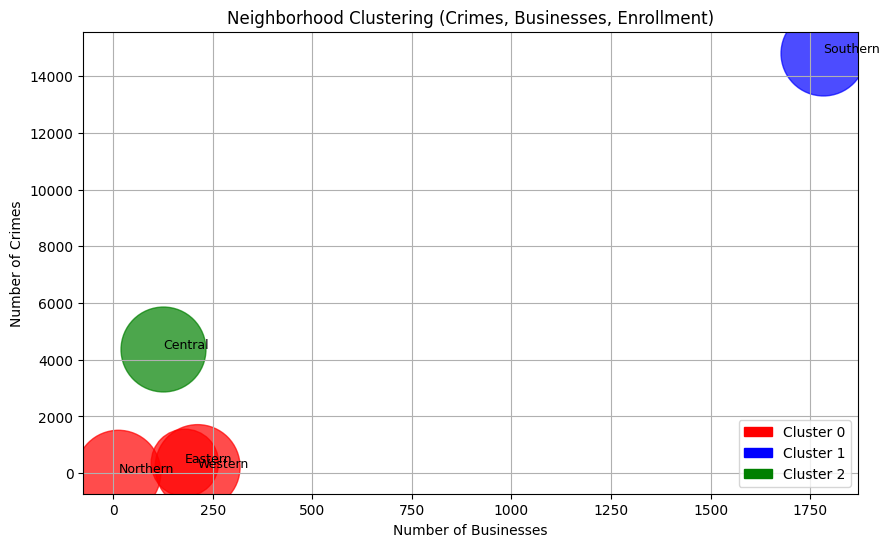

In [9]:
colors = {0: 'red', 1: 'blue', 2: 'green'}
plt.figure(figsize=(10, 6))
for cluster in f["Cluster"].unique():
    cluster_data = f[f["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Number of Businesses"], 
        cluster_data["Number of Crimes"], 
        label=f"Cluster {cluster}", 
        color=colors[cluster],  
        s=cluster_data["Enrollment"] * 10, 
        alpha=0.7
    )
    for _, row in cluster_data.iterrows():
        plt.text(row["Number of Businesses"], row["Number of Crimes"], row["Categorised_Nhoods"], fontsize=9)
legend_handles = [Patch(color=colors[i], label=f"Cluster {i}") for i in colors]
plt.legend(handles=legend_handles, loc='lower right')  
plt.title("Neighborhood Clustering (Crimes, Businesses, Enrollment)")
plt.xlabel("Number of Businesses")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

In [80]:
x=f[['Enrollment','Number of Crimes','Number of Businesses']]

In [81]:
y=f['Categorised_Nhoods']

In [82]:
Model=DecisionTreeClassifier()
Model.fit(x,y)

DecisionTreeClassifier()

In [87]:
test_data = {
    "Categorised_Nhoods": ["Central", "Eastern", "Northern", "Western", "Central"],
    "Enrollment": [350.25, 300.75, 400.10, 375.50, 350.00],
    "Number of Crimes": [4500, 1200, 50, 15000, 300],
    "Number of Businesses": [150, 100, 10, 2000, 80]
}
test_data=pd.DataFrame(test_data)

In [91]:
xtest=test_data[['Enrollment','Number of Crimes','Number of Businesses']]
ytest=test_data['Categorised_Nhoods']
pred=Model.predict(xtest)

In [95]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

     Central       1.00      1.00      1.00         2
     Eastern       1.00      1.00      1.00         1
    Northern       1.00      1.00      1.00         1
    Southern       0.00      0.00      0.00         0
     Western       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.60      0.60      0.60         5
weighted avg       0.80      0.80      0.80         5



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

REFERENCES

 
[1] Data.gov. (2024, October 4). City of Los Angeles - Crime Data from 2020 to Present. https://catalog.data.gov/dataset/crime-data-from-2020-to-present

[2] Data.gov. (2024a, September 20). City of Los Angeles - Listing of active businesses. https://catalog.data.gov/dataset/listing-of-active-businesses

[3] County of Los Angeles open data. (n.d.). https://data.lacounty.gov/datasets/32331535785b405d869ca7a7aa3abb1f/explore

[4] W3Schools.com. (n.d.). https://www.w3schools.com/python/pandas/pandas_cleaning.asp

[5] GeeksforGeeks. (2024, June 11). What is Data Visualization and Why is It Important?
GeeksforGeeks. https://www.geeksforgeeks.org/data-visualization-and-its-importance/

[6] GeeksforGeeks. (2024b, September 12). Data preprocessing in data mining. GeeksforGeeks. https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/

[7] GeeksforGeeks. (2022, November 14). Google Geocoding Web Service (JSON response). GeeksforGeeks. https://www.geeksforgeeks.org/google-geo-coding-web-service-json-response/

[8] Merge, join, concatenate and compare — pandas 2.2.3 documentation. (n.d.). https://pandas.pydata.org/docs/user_guide/merging.html

[9] Ibm. (2024, October 28). Exploratory Data Analysis. Idk. https://www.ibm.com/topics/exploratory-data-analysis
